In [1641]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1643]:
df = pd.read_csv('data_cleaned1.csv')

In [1645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   int64  
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


In [2143]:
df['glucose'].max()

107.0

In [1647]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0,0,1,0,312.0,175.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,40.0,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


In [1649]:
df = df.rename(columns={'male':'gender'})

In [1651]:
df['cigsPerDay'] = df['cigsPerDay'].astype(int)

In [1653]:
df['cigsPerDay'].unique()

array([ 0, 20, 30, 23, 15,  9, 10,  5, 35, 40,  1,  3,  2, 12,  4, 18, 25,
       14,  8, 13, 11,  7,  6, 38, 29, 17, 16, 19])

## SPLIT THE DATA 

In [1656]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [1658]:
X

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1,0,0,1,0,312.0,175.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,40,0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20,0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15,0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0


In [1660]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [1662]:
#total propotion of target feature 
df['TenYearCHD'].value_counts(normalize=True)*100

TenYearCHD
0    84.804153
1    15.195847
Name: proportion, dtype: float64

### smote

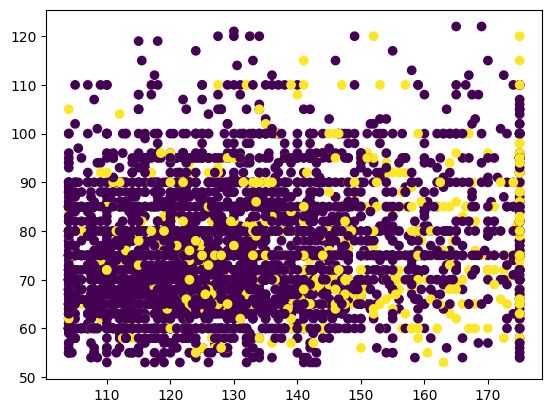

In [1665]:
plt.scatter(df['sysBP'],df['heartRate'],c=df['TenYearCHD'])

In [1886]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=1)
X_smote , y_smote = smote.fit_resample(X,y)

In [1888]:
X_smote = pd.DataFrame(X_smote).round(2)
X_smote['education'] = X_smote['education'].round(1)
X_smote

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0,0,0,0,0,195.00,106.00,70.00,26.97,80.00,77.00
1,0,46,2.0,0,0,0,0,0,0,250.00,121.00,81.00,28.73,95.00,76.00
2,1,48,1.0,1,20,0,0,0,0,245.00,127.50,80.00,25.34,75.00,70.00
3,0,61,3.0,1,30,0,0,1,0,225.00,150.00,95.00,28.58,65.00,103.00
4,0,46,3.0,1,23,0,0,0,0,285.00,130.00,84.00,23.10,85.00,85.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,0,54,3.0,1,38,0,0,0,0,283.69,144.83,91.17,26.48,72.00,91.70
7184,0,48,1.5,1,18,0,0,0,0,195.00,121.64,72.95,21.84,80.33,65.43
7185,0,57,1.0,0,0,0,0,1,0,277.73,149.53,99.01,34.50,72.70,97.23
7186,0,54,1.0,0,4,0,0,0,0,197.29,175.00,104.57,29.70,62.05,70.23


In [1890]:
y_smote.value_counts()

TenYearCHD
0    3594
1    3594
Name: count, dtype: int64

In [1892]:
y_ = pd.DataFrame(y_smote)

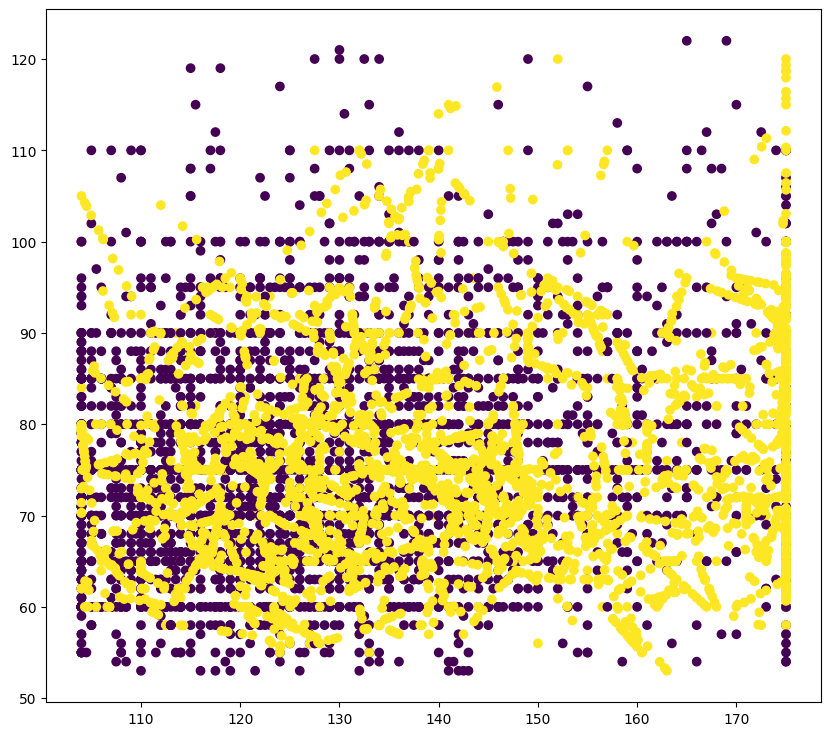

In [1894]:
plt.figure(figsize=(10,9))
plt.scatter(X_smote['sysBP'],X_smote['heartRate'],c=y_['TenYearCHD'])

In [1895]:
X_smote.shape,y_smote.shape

((7188, 15), (7188,))

# Feature selection 

## Understanding multicollinearity 

<Axes: >

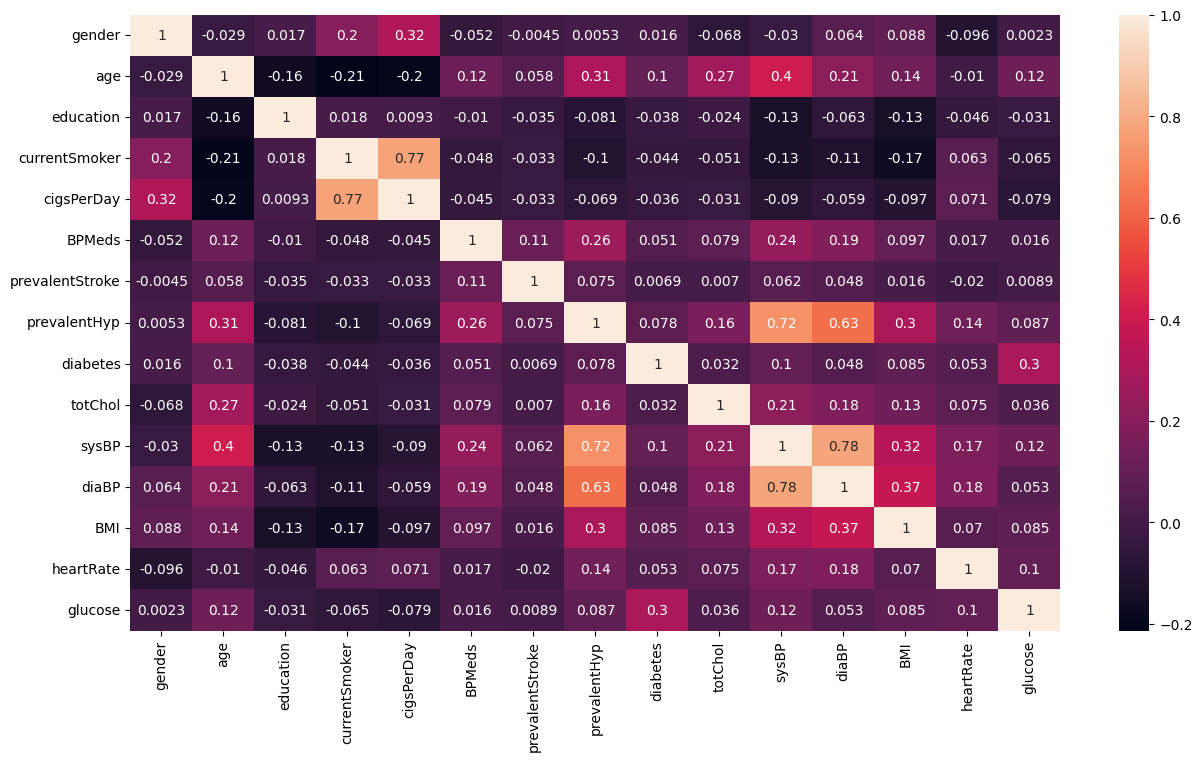

In [1900]:
corr = X.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)

### Observation
  - no such multicollinearity
  - biggest one is , sysBP and diaBP with 78% correlated  with moderate level 

## by backward elimination 

In [1904]:
import statsmodels.api as sm

#add constant value with all feature 
X_with_constant = sm.add_constant(X_smote)   # purpose ariyilla , nokkanm 

#fit the model 
model = sm.Logit(y_smote,X_with_constant).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.607218
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 7188
Model:                          Logit   Df Residuals:                     7172
Method:                           MLE   Df Model:                           15
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.1240
Time:                        15:59:46   Log-Likelihood:                -4364.7
converged:                       True   LL-Null:                       -4982.3
Covariance Type:            nonrobust   LLR p-value:                4.223e-254
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.8873      0.430    -18.359      0.000      -8.729      -7.045
gender        

In [1906]:
significant_level = 0.05
features = pd.DataFrame({ 'feature' : list(X_with_constant.columns) , 'p-value' : model.pvalues.values })

In [1908]:
features

,feature,p-value
0,const,2.772280e-75
1,gender,7.156246e-11
2,age,1.736466e-73
3,education,6.218000e-02
4,currentSmoker,5.827701e-15
5,cigsPerDay,2.727730e-44
6,BPMeds,8.735897e-06
7,prevalentStroke,3.343062e-01
8,prevalentHyp,7.230802e-15
9,diabetes,7.848873e-02


In [1910]:
for i in range(0,len(X_with_constant)):
    max = features['p-value'].max()
    if max > significant_level:
        feature_to_remove = features.loc[features['p-value'] == max, 'feature'].values[0]
        if feature_to_remove == 'const':
            print('Intercept has high p-value but is generally retained in logistic regression')
            break
        else:
            print(f'Removing feature is "{feature_to_remove}" with p-value is {max}')
            X_with_constant = X_with_constant.drop(columns = feature_to_remove)
            model = sm.Logit(y_smote,X_with_constant).fit()
            print(model)
            features = pd.DataFrame({ 'feature' : list(X_with_constant.columns) , 'p-value' : model.pvalues.values })
        
        
        

Removing feature is "BMI" with p-value is 0.47100250918082587
Optimization terminated successfully.
         Current function value: 0.607254
         Iterations 5
Removing feature is "prevalentStroke" with p-value is 0.331700147166456
Optimization terminated successfully.
         Current function value: 0.607320
         Iterations 5
Removing feature is "diabetes" with p-value is 0.07972717487756491
Optimization terminated successfully.
         Current function value: 0.607533
         Iterations 5
Removing feature is "education" with p-value is 0.056105428798166025
Optimization terminated successfully.
         Current function value: 0.607786
         Iterations 5


In [1912]:
X_with_constant

,const,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,diaBP,heartRate,glucose
0,1.0,1,39,0,0,0,0,195.00,106.00,70.00,80.00,77.00
1,1.0,0,46,0,0,0,0,250.00,121.00,81.00,95.00,76.00
2,1.0,1,48,1,20,0,0,245.00,127.50,80.00,75.00,70.00
3,1.0,0,61,1,30,0,1,225.00,150.00,95.00,65.00,103.00
4,1.0,0,46,1,23,0,0,285.00,130.00,84.00,85.00,85.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1.0,0,54,1,38,0,0,283.69,144.83,91.17,72.00,91.70
7184,1.0,0,48,1,18,0,0,195.00,121.64,72.95,80.33,65.43
7185,1.0,0,57,0,0,0,1,277.73,149.53,99.01,72.70,97.23
7186,1.0,0,54,0,4,0,0,197.29,175.00,104.57,62.05,70.23


In [1914]:
X_with_constant['const'].unique()

array([1.])

In [1916]:
X_with_constant = X_with_constant.drop(columns='const')

In [1918]:
X_with_constant

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,diaBP,heartRate,glucose
0,1,39,0,0,0,0,195.00,106.00,70.00,80.00,77.00
1,0,46,0,0,0,0,250.00,121.00,81.00,95.00,76.00
2,1,48,1,20,0,0,245.00,127.50,80.00,75.00,70.00
3,0,61,1,30,0,1,225.00,150.00,95.00,65.00,103.00
4,0,46,1,23,0,0,285.00,130.00,84.00,85.00,85.00
...,...,...,...,...,...,...,...,...,...,...,...
7183,0,54,1,38,0,0,283.69,144.83,91.17,72.00,91.70
7184,0,48,1,18,0,0,195.00,121.64,72.95,80.33,65.43
7185,0,57,0,0,0,1,277.73,149.53,99.01,72.70,97.23
7186,0,54,0,4,0,0,197.29,175.00,104.57,62.05,70.23


# Why Remove Certain Features in Feature Selection

If you don't remove the features listed under "removed feature" (e.g., `['education', 'currentSmoker', 'diaBP', 'BMI', 'heartRate']`), your model might not be optimized in terms of performance, especially if you're using regularization (like LassoCV). Here’s why:

## Why Remove Certain Features?

1. **Multicollinearity**: Features that are highly correlated with each other might add noise and reduce the model's predictive performance. LassoCV helps to remove less important or highly correlated features to prevent overfitting and reduce multicollinearity.
   
2. **Irrelevant or Redundant Features**: If features like `education` or `BMI` are not contributing meaningfully to the model, keeping them could introduce unnecessary complexity, leading to overfitting.

3. **Lasso Regularization**: LassoCV (L1 regularization) works by shrinking some feature coefficients to zero. The features that end up with coefficients equal to zero are considered irrelevant for the prediction. If you do not remove these features (i.e., keep them in the dataset), they will still exist in the data, but their influence on the prediction will be minimal (since their coefficients are zero).

## Potential Issues If Not Removed:

1. **Model Complexity**: Keeping irrelevant features increases model complexity without adding any predictive value. This could lead to slower training times and unnecessary computational costs.

2. **Overfitting**: If you have many irrelevant features, it might cause the model to overfit the training data, where it performs well on training but poorly on unseen data (i.e., test data).

3. **Interpretability**: Removing unimportant features makes the model easier to interpret. A simpler model (with fewer features) is often preferred in terms of understanding how each feature contributes to the target prediction.

## Features That Are Removed:
- **education**: May not have a strong correlation with CHD prediction.
- **currentSmoker**: This might be highly correlated with `cigsPerDay`, so it may not add much value when both are included.
- **diaBP, BMI, heartRate**: If these features have little correlation with the target or have low importance after regularization, removing them helps streamline the model.

## How These Removed Features Don't Fit the Target:
LassoCV sets the coefficients for features that don't contribute to the prediction to zero. This means the model learns that these features don't have a significant relationship with the target variable (`TenYearCHD`). For example, `education` might not correlate with heart disease risk as strongly as `age`, `sysBP`, or `glucose`, so it gets removed from the final model.

## What to Do:
1. **If you don't remove features** that LassoCV suggests removing, the model will still work, but the features will not have much impact on the target because their coefficients will be zero. It might add unnecessary noise, leading to more complex models without improving performance.
   
2. **Consider feature importance**: If you're unsure whether to remove certain features, you can also look into other methods (e.g., feature importance from decision trees or random forests) to confirm whether the removed features are irrelevant.

## Conclusion:
It’s best to remove the features that LassoCV identifies as having zero coefficients. This ensures a simpler, more efficient, and interpretable model that avoids overfitting and improves generalization. However, if you decide to keep them, their impact on predictions will be minimal, and they will likely not contribute to improving model performance.


## Train test split

In [1921]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_with_constant,y_smote,test_size=0.30,random_state=42,stratify=y_smote)

In [1924]:
X_train

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,totChol,sysBP,diaBP,heartRate,glucose
5259,0,52,1,20,0,1,291.78,141.99,89.59,106.02,75.21
3735,0,55,0,0,0,0,257.00,132.00,81.00,60.00,86.00
5875,1,56,1,17,0,1,217.50,158.50,95.75,63.50,69.00
6067,1,54,0,0,0,0,215.72,135.27,78.91,57.36,74.46
6287,1,63,1,16,0,1,204.32,175.00,101.47,81.42,107.00
...,...,...,...,...,...,...,...,...,...,...,...
4880,0,67,0,3,0,0,247.25,127.13,68.00,70.00,90.06
1862,1,42,0,0,0,0,283.00,137.00,91.00,75.00,67.00
4724,0,50,0,0,0,0,312.00,134.03,86.99,75.00,86.89
5106,0,55,0,2,0,0,195.91,175.00,104.57,61.20,69.72


In [1926]:
y_train

5259    1
3735    0
5875    1
6067    1
6287    1
       ..
4880    1
1862    0
4724    1
5106    1
5959    1
Name: TenYearCHD, Length: 5031, dtype: int64

### Stratify in Train-Test Split

When splitting the dataset into training and testing sets, **`stratify`** ensures the class proportions in the train and test sets are consistent with the original dataset.

---

#### **Without Stratify:**
- Splits the data randomly.
- Class proportions in train/test sets may differ from the original dataset.
- Example:
  - Original Dataset: Class 0 = 80%, Class 1 = 20%
  - Train Set: Class 0 = 85%, Class 1 = 15% (random imbalance)
  - Test Set: Class 0 = 75%, Class 1 = 25% (random imbalance)

---

#### **With Stratify:**
- Maintains the same class proportions as the original dataset.
- Example:
  - Original Dataset: Class 0 = 80%, Class 1 = 20%
  - Train Set: Class 0 = 80%, Class 1 = 20%
  - Test Set: Class 0 = 80%, Class 1 = 20%

---

#### **Why Use Stratify?**
1. **Consistency:** Ensures the train and test sets represent the original dataset.
2. **Fair Evaluation:** Prevents uneven splits, especially important for imbalanced datasets.

---


## standardizing 

In [1930]:
from sklearn.preprocessing import StandardScaler

In [1932]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Model training 

In [1935]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [1937]:
y_pred = logistic.predict(X_test)

In [1939]:
logistic.predict_proba(X_test)

array([[0.64043842, 0.35956158],
       [0.19572877, 0.80427123],
       [0.35569222, 0.64430778],
       ...,
       [0.25203906, 0.74796094],
       [0.67266968, 0.32733032],
       [0.44799953, 0.55200047]])

In [1941]:
logistic.coef_

array([[-0.19834743,  0.56673655, -0.34413694,  0.66559757, -0.06488176,
        -0.30373075,  0.08214991,  0.42656325,  0.23492085, -0.14268945,
         0.06716236]])

In [1943]:
logistic.intercept_

array([-0.00441362])

In [1945]:
#performance metrix 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(score)
print(cm)
print(classification_report(y_test,y_pred))

0.6662030598052852
[[713 366]
 [354 724]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1079
           1       0.66      0.67      0.67      1078

    accuracy                           0.67      2157
   macro avg       0.67      0.67      0.67      2157
weighted avg       0.67      0.67      0.67      2157



## Fine tuning & maintain imbalnced data

## grid search { hyper parameter tuning }

In [1949]:
model = LogisticRegression()
class_weight = ['balanced']

In [1989]:
params = [
    {
        'penalty' : ['l1','l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'class_weight' : class_weight,
        'max_iter': [1000],
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg'],
        'class_weight' : class_weight,
        'max_iter': [1000],
    }
]

In [1991]:
params

[{'penalty': ['l1', 'l2'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'solver': ['liblinear', 'saga'],
  'class_weight': ['balanced'],
  'max_iter': [1000]},
 {'penalty': ['l2'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'solver': ['lbfgs', 'newton-cg'],
  'class_weight': ['balanced'],
  'max_iter': [1000]}]

In [1993]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV( estimator = model,param_grid = params, scoring = 'accuracy',cv=cv,n_jobs=-1)

In [1995]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced'], 'max_iter': [1000],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'class_weight': ['balanced'], 'max_iter': [1000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg']}],
             scoring='accuracy')

In [1996]:
grid.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [1999]:
grid.best_score_

0.6612993340848652

In [2001]:
y_prediction = grid.predict(X_test)
#performance metrix 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
score = accuracy_score(y_test,y_prediction)
cm = confusion_matrix(y_test,y_prediction)
print(score)
print(cm)
print(classification_report(y_test,y_prediction))

0.6638850254983774
[[711 368]
 [357 721]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1079
           1       0.66      0.67      0.67      1078

    accuracy                           0.66      2157
   macro avg       0.66      0.66      0.66      2157
weighted avg       0.66      0.66      0.66      2157



In [2080]:
data = scaler.transform([[1,69,1,20,1,1,294,104,68,62,66]])
grid.predict(data)[0]

/home/fadhil/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

In [2068]:
y_test_prob = grid.predict_proba(X_test)[:,-1]
threshold = 0.4
y_pred_custom = (y_test_prob>=threshold).astype(int)

In [2070]:
score = accuracy_score(y_test,y_pred_custom)
cm = confusion_matrix(y_test,y_pred_custom)
print(score)
print(cm)
print(classification_report(y_test,y_pred_custom))

0.6518312471024571
[[506 573]
 [178 900]]
              precision    recall  f1-score   support

           0       0.74      0.47      0.57      1079
           1       0.61      0.83      0.71      1078

    accuracy                           0.65      2157
   macro avg       0.68      0.65      0.64      2157
weighted avg       0.68      0.65      0.64      2157



In [2096]:
data = scaler.transform([[1,69,1,20,1,1,294,104,68,62,66]])
pred = grid.predict_proba(data)[:,-1]
res = (pred>=threshold).astype(int)
res[0]

/home/fadhil/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1

In [2098]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2100]:
dummy_model_probs = [0 for _ in range(len(y_test))]

In [2104]:
model_prob = grid.predict_proba(X_test)
model_prob

array([[0.63001699, 0.36998301],
       [0.21293859, 0.78706141],
       [0.36047419, 0.63952581],
       ...,
       [0.26736849, 0.73263151],
       [0.65447051, 0.34552949],
       [0.45079864, 0.54920136]])

In [2106]:
model_prob = model_prob[:,-1]

In [2108]:
dummy_model_auc = roc_auc_score(y_test,dummy_model_probs)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.7229852763415586


In [2110]:
dummyfpr , dummytpr, _ = roc_curve(y_test,dummy_model_probs)
modelfpr , modeltpr, thresholds = roc_curve(y_test,model_prob)

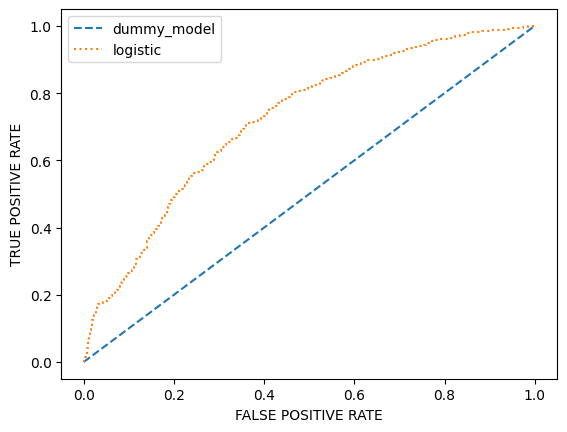

In [2112]:
# plot the roc curve 
plt.plot(dummyfpr,dummytpr,linestyle = '--',label='dummy_model')
plt.plot(modelfpr,modeltpr,linestyle = 'dotted',label='logistic')
#axis label 
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

In [2114]:
thresholds

array([       inf, 0.92288278, 0.86722385, 0.8534172 , 0.84873995,
       0.84849186, 0.84838116, 0.84777805, 0.84471853, 0.84309206,
       0.8430281 , 0.84248116, 0.84107708, 0.84005282, 0.82064716,
       0.82058898, 0.81918709, 0.81896471, 0.81824457, 0.81781398,
       0.81436577, 0.81297448, 0.80193995, 0.80152328, 0.80083535,
       0.80034379, 0.79066479, 0.79050162, 0.78841607, 0.78815703,
       0.78446599, 0.78186376, 0.78130242, 0.7803673 , 0.77608696,
       0.77537567, 0.7705861 , 0.77034076, 0.76772696, 0.76627632,
       0.76533629, 0.76527215, 0.76097677, 0.76082704, 0.76006561,
       0.75902642, 0.75824776, 0.7582276 , 0.75809869, 0.75783578,
       0.75674347, 0.75634912, 0.75478647, 0.75442238, 0.75363385,
       0.75340746, 0.75120064, 0.74944565, 0.7462635 , 0.74580494,
       0.7451095 , 0.74488713, 0.7448039 , 0.74421563, 0.74383303,
       0.74338741, 0.7430125 , 0.74121511, 0.7400424 , 0.73828437,
       0.73786974, 0.73708195, 0.73685018, 0.7358675 , 0.73569

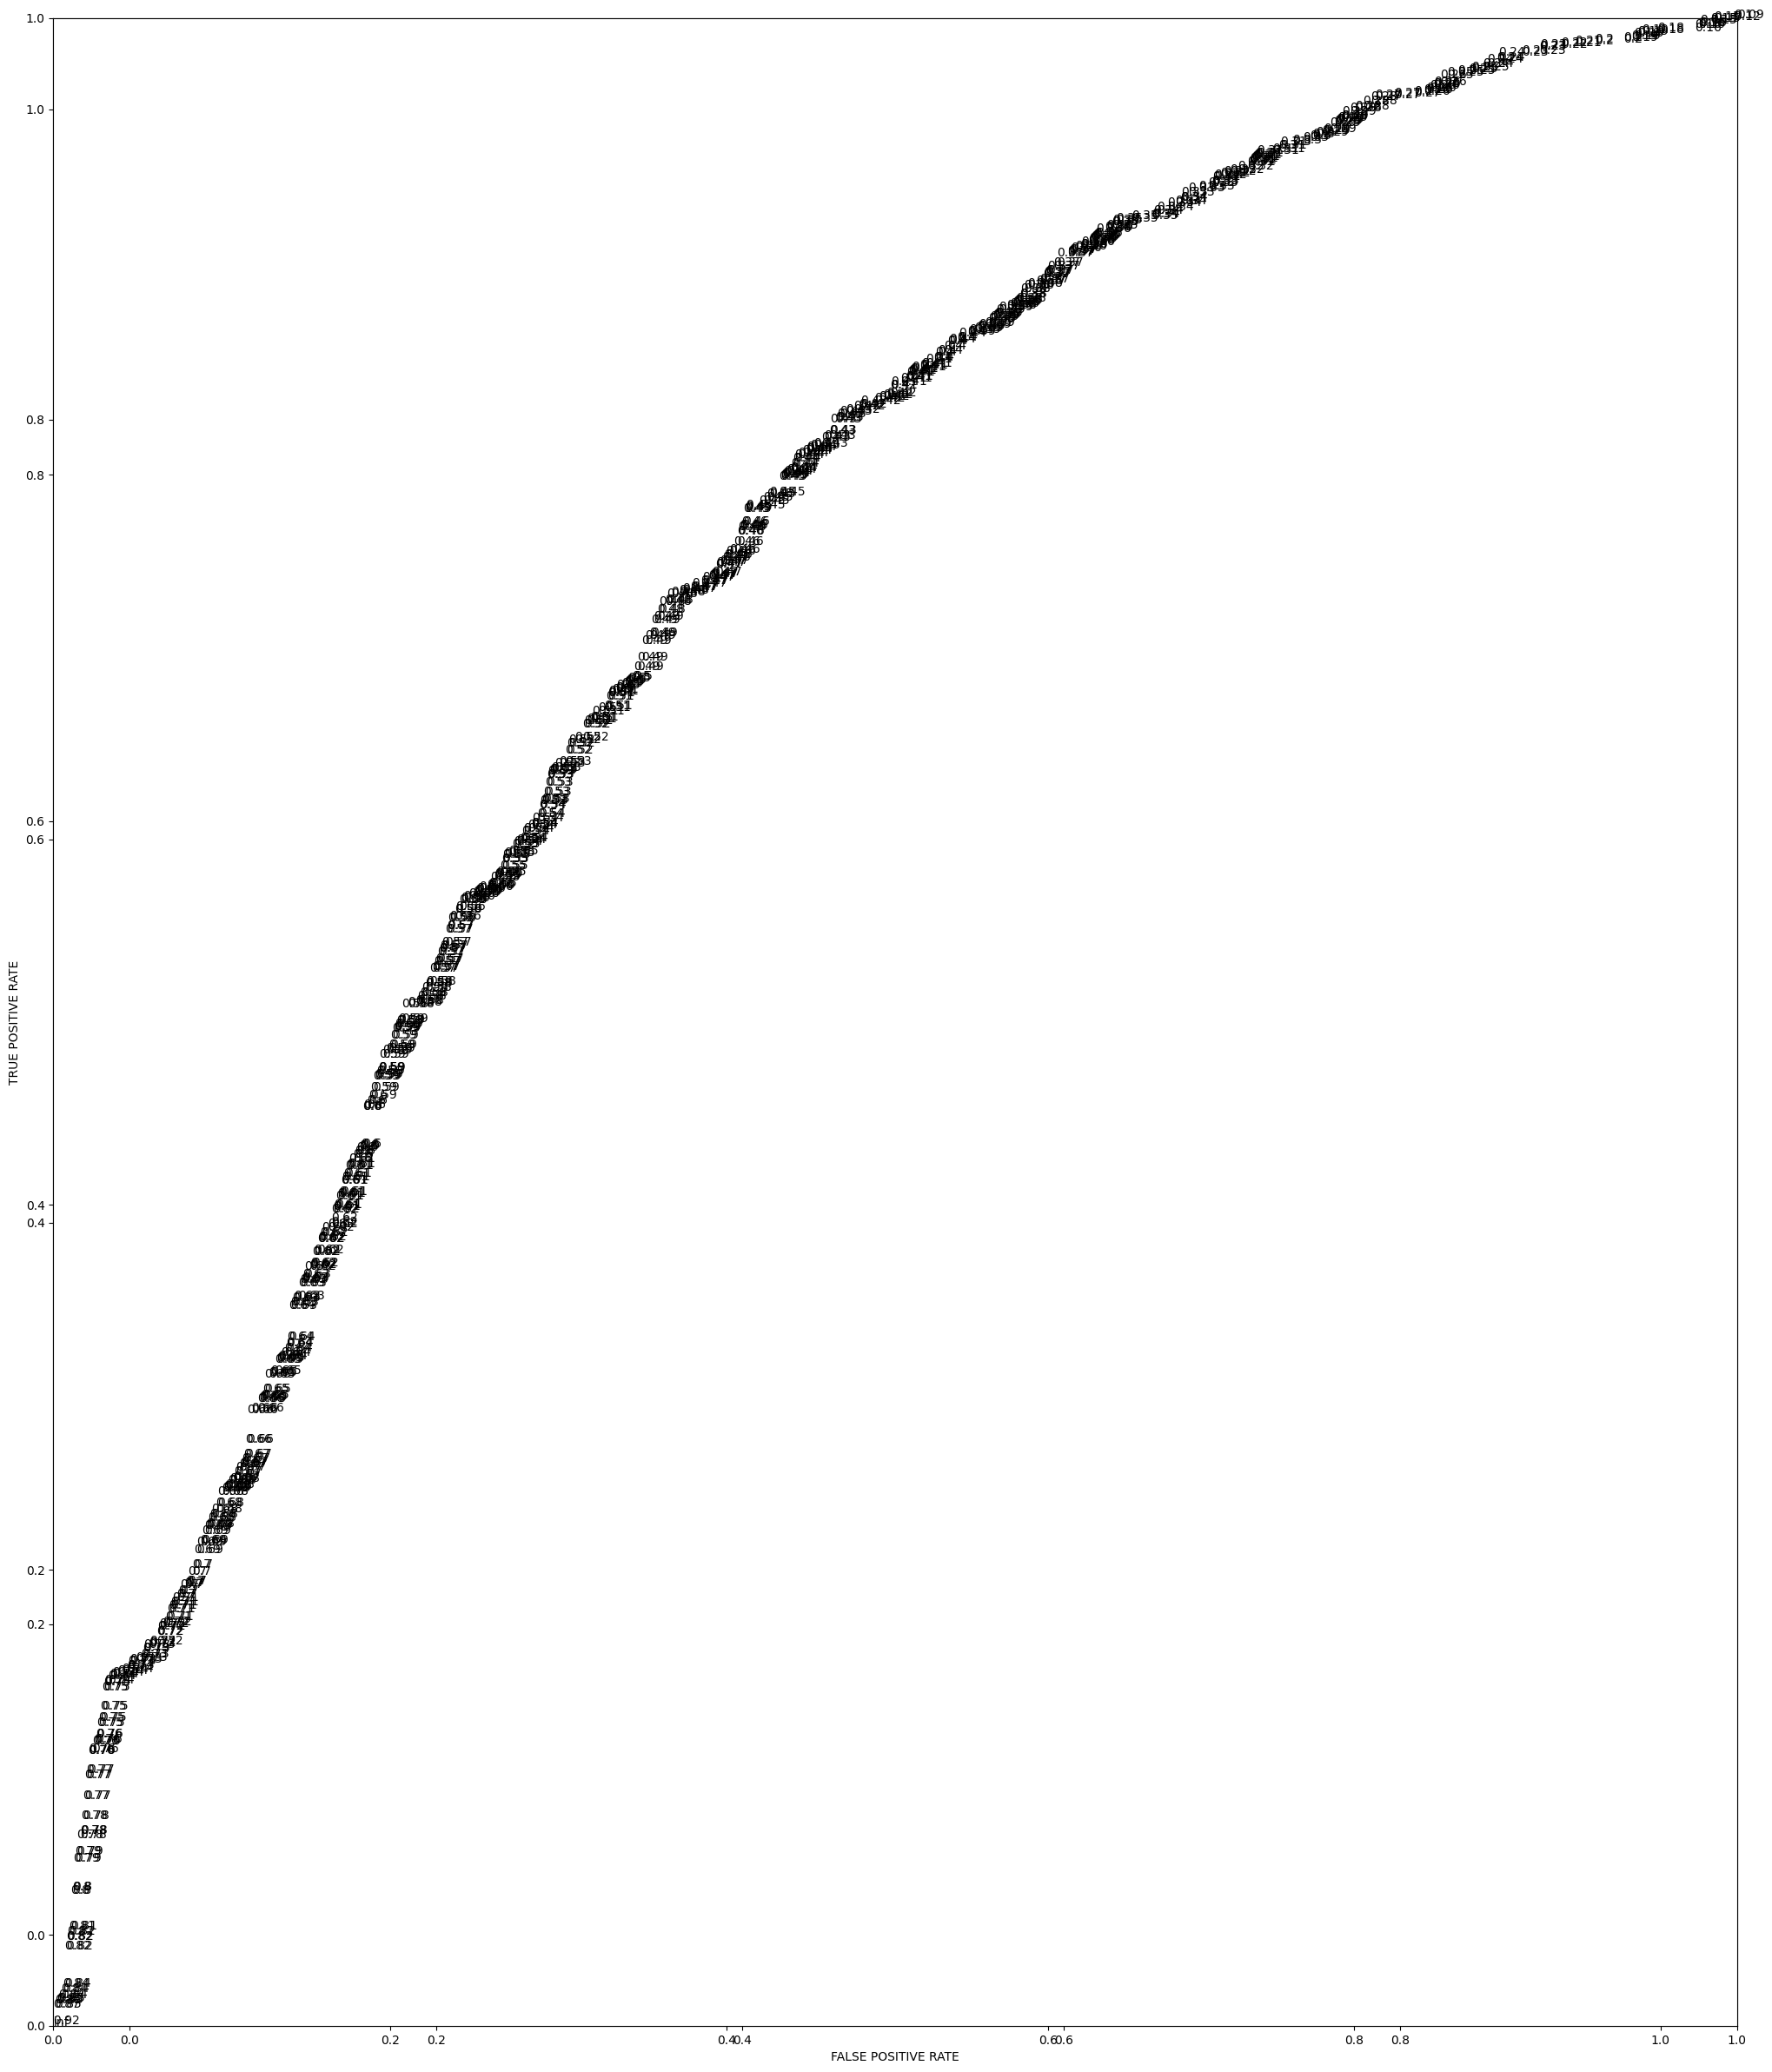

In [2117]:
#plotting roc curve 
fig = plt.figure(figsize=(25,30))
plt.plot(dummyfpr,dummytpr,linestyle = '--',label='dummy_model')
plt.plot(modelfpr,modeltpr,linestyle = 'dotted',label='logistic')
ax = fig.add_subplot(111)
for xyz in zip(modelfpr,modeltpr,thresholds):
    ax.annotate('%s' % np.round(xyz[2],2), xy=(xyz[0],xyz[1]))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')

plt.show()

### **Confusion Matrix Interpretation**

```
[[1068   11]   <- Row for Class 0
 [ 183   10]]  <- Row for Class 1
```

#### **What it means:**
1. **True Negatives (TN = 1068):**
   - 1068 people correctly predicted as **Class 0** (No CHD risk).

2. **False Positives (FP = 11):**
   - 11 people incorrectly predicted as **Class 1** (CHD risk), but they actually belong to **Class 0**.

3. **False Negatives (FN = 183):**
   - 183 people incorrectly predicted as **Class 0** (No CHD risk), but they actually belong to **Class 1**.

4. **True Positives (TP = 10):**
   - Only 10 people correctly predicted as **Class 1** (CHD risk).

---

### **Classification Report Metrics:**

#### **Class 0 (No CHD Risk):**
- **Precision (0.85):**
  - When the model predicts "No CHD risk," it is correct **85% of the time**.
- **Recall (0.99):**
  - Out of all people who actually have "No CHD risk," the model identifies **99% of them** correctly.
- **F1-Score (0.92):**
  - The overall balance of precision and recall for "No CHD risk" is very high.

#### **Class 1 (CHD Risk):**
- **Precision (0.48):**
  - When the model predicts "CHD risk," it is correct only **48% of the time**.
- **Recall (0.05):**
  - Out of all people who actually have "CHD risk," the model identifies only **5% of them** correctly. (Very poor recall).
- **F1-Score (0.09):**
  - The overall performance for predicting "CHD risk" is very low.

---

### **Overall Metrics:**

- **Accuracy (0.85):**
  - The model is correct **85% of the time**, but this is heavily influenced by the dominant Class 0 (No CHD risk).

- **Macro Avg:**
  - Averages the metrics equally for both classes:
    - Precision = 0.66
    - Recall = 0.52
    - F1-Score = 0.51
  - Indicates poor performance on Class 1.

- **Weighted Avg:**
  - Weights metrics based on the number of samples in each class:
    - Precision = 0.80
    - Recall = 0.85
    - F1-Score = 0.79
  - Heavily influenced by the majority Class 0.

---

### **Key Takeaways:**
- The model performs **very well** for predicting **Class 0** (No CHD risk).
- The model performs **very poorly** for predicting **Class 1** (CHD risk).
- The imbalance in the dataset (Class 0 dominating) is likely causing this issue.

---

### **Next Steps to Improve:**
1. **Handle Class Imbalance:**
   - Use techniques like:
     - **Class weights** (already used but may need better tuning).
     - **Oversampling** (e.g., SMOTE) or **undersampling**.
2. **Adjust Threshold:**
   - Experiment with decision thresholds to improve recall for Class 1.
3. **Feature Engineering:**
   - Check if additional features can help the model distinguish better between the classes.
4. **Try Other Algorithms:**
   - Random Forest, Gradient Boosting, etc., which handle imbalance better.

---



# Evaluation Results

## Good Results:
- **High Recall for CHD=1 (Positive class)**: The model correctly identifies most of the CHD=1 cases.
- **Balanced Precision and Recall**: Good precision means fewer false positives, and good recall means fewer false negatives.
- **High ROC-AUC score**: Closer to 1 means the model is doing well at distinguishing between the two classes.

Example of Good Result:
- Precision: 0.98, Recall: 0.89, F1-score: 0.94
- ROC-AUC Score: 0.92

---

## Poor Results:
- **Low Recall for CHD=1**: The model misses many actual CHD=1 cases.
- **Low Precision for CHD=1**: The model wrongly predicts too many CHD=1 cases.
- **Low ROC-AUC score**: Close to 0.5 means the model is not distinguishing between the two classes well.

Example of Poor Result:
- Precision: 0.45, Recall: 0.20, F1-score: 0.28
- ROC-AUC Score: 0.50

---

## Conclusion:
- **Good Results**: High recall, balanced precision and recall, high ROC-AUC.
- **Poor Results**: Low recall, low precision, low ROC-AUC.


[[True Negatives (TN), False Positives (FP)]
 [False Negatives (FN), True Positives (TP)]]
